In [1]:
#%matplotlib -l
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from collections import OrderedDict

#plt.style.use('seaborn-notebook')
#plt.style.available

In [2]:
import sys
sys.path.append('D:/Study/Python')
import pankaj_python_lib as pankaj


In [3]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
sns.set(palette='RdYlGn')
sns.set_style('darkgrid')

<Figure size 864x576 with 0 Axes>

In [4]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [5]:
style.use('seaborn-notebook')

In [6]:
pd.set_option('display.max_columns', None)
#pd.options.display.max_columns = 5
#pd.options.display.max_rows = 20



In [7]:
df_train = pd.read_csv("D:/Study/Python/data-set/house_prices_advanced_regression_techniques/train.csv")
df_test = pd.read_csv("D:/Study/Python/data-set/house_prices_advanced_regression_techniques/test.csv")

In [8]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df_train.columns[df_train.isna().any()].size

19

In [10]:
features_with_na = [feature for feature in df_train.columns if df_train[feature].isna().sum()>0]
len(features_with_na)

19

In [11]:
features_with_na = df_train.columns[df_train.isna().any()]
len(features_with_na)

19

In [12]:
na_map_per = {x:round(df_train[x].isna().mean()*100, 2) for x in df_train.columns[df_train.isna().any()]}
na_map_per = dict(sorted(list(na_map_per.items()), key=lambda x:(x[1], x[0].lower()), reverse=True))
na_map_per

{'PoolQC': 99.52,
 'MiscFeature': 96.3,
 'Alley': 93.77,
 'Fence': 80.75,
 'FireplaceQu': 47.26,
 'LotFrontage': 17.74,
 'GarageYrBlt': 5.55,
 'GarageType': 5.55,
 'GarageQual': 5.55,
 'GarageFinish': 5.55,
 'GarageCond': 5.55,
 'BsmtFinType2': 2.6,
 'BsmtExposure': 2.6,
 'BsmtQual': 2.53,
 'BsmtFinType1': 2.53,
 'BsmtCond': 2.53,
 'MasVnrType': 0.55,
 'MasVnrArea': 0.55,
 'Electrical': 0.07}

In [13]:
na_map = {x:df_train[x].isna().sum() for x in df_train.columns if df_train[x].isna().any()}
na_map = dict(sorted(list(na_map.items()), key=lambda x:(x[1], x[0].lower()), reverse=True))
na_map

{'PoolQC': 1453,
 'MiscFeature': 1406,
 'Alley': 1369,
 'Fence': 1179,
 'FireplaceQu': 690,
 'LotFrontage': 259,
 'GarageYrBlt': 81,
 'GarageType': 81,
 'GarageQual': 81,
 'GarageFinish': 81,
 'GarageCond': 81,
 'BsmtFinType2': 38,
 'BsmtExposure': 38,
 'BsmtQual': 37,
 'BsmtFinType1': 37,
 'BsmtCond': 37,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'Electrical': 1}

In [14]:
df_train['LotFrontage'].isna().sum(), df_train['LotFrontage'].isna().count()

(259, 1460)

<ipython-input-16-91315dc0479d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = np.where(df_train[feature].isna(), 'n/a', 'non n/a')


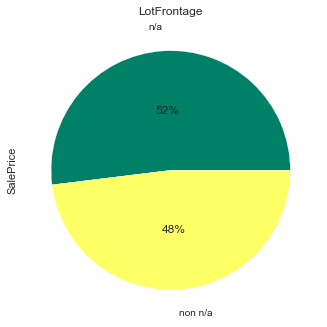

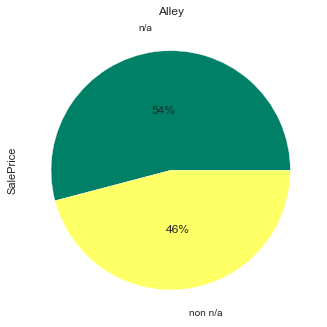

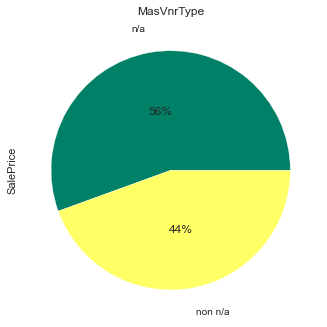

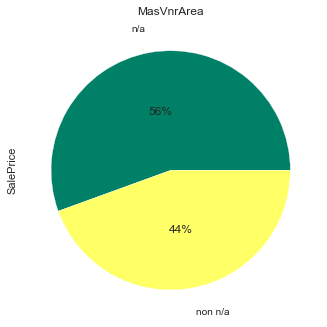

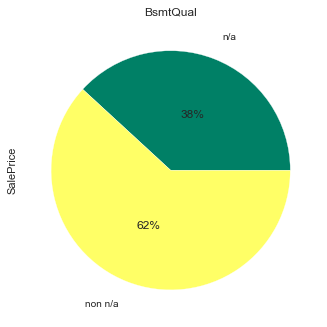

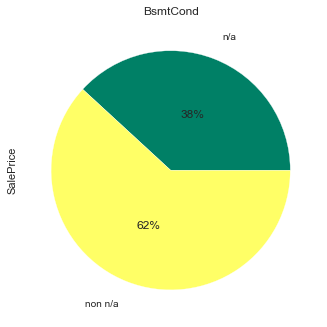

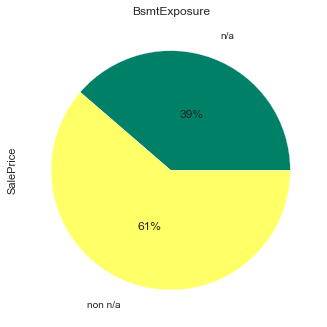

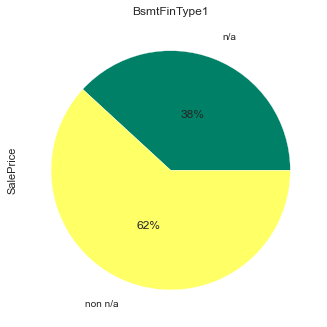

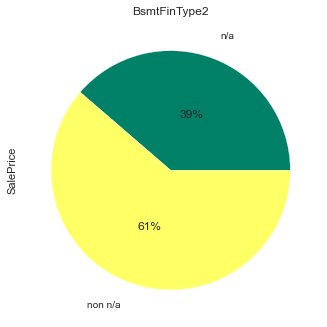

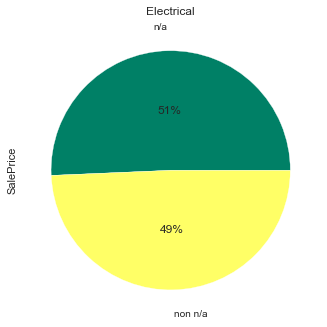

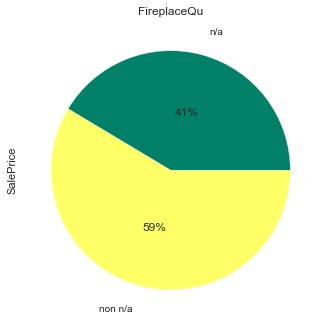

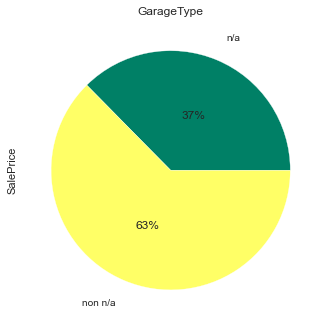

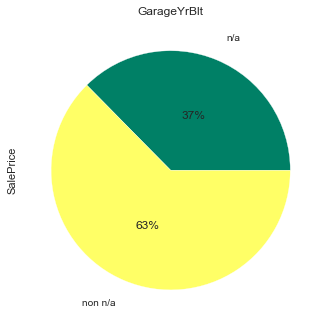

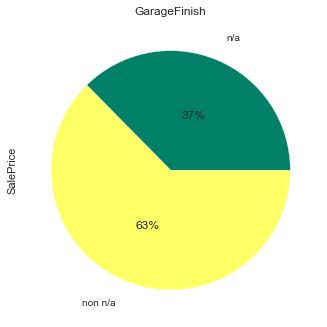

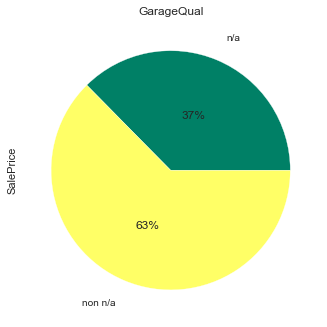

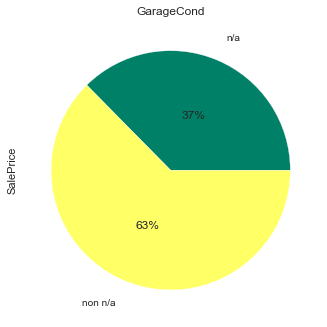

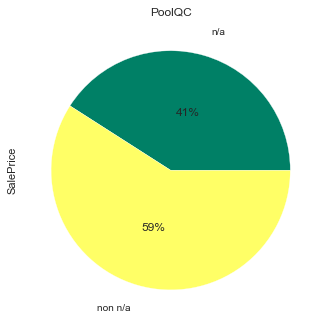

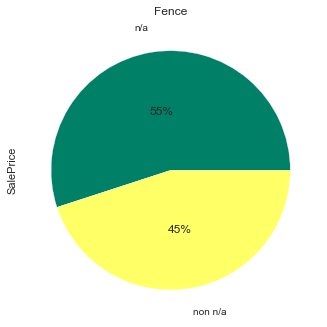

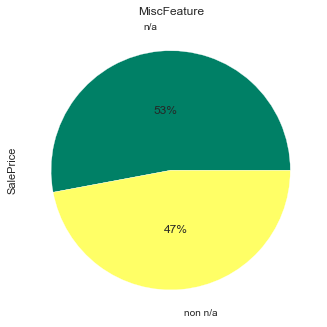

In [16]:
for feature in features_with_na:
    data = df_train[['SalePrice']]
    data[feature] = np.where(df_train[feature].isna(), 'n/a', 'non n/a')
    data.groupby(feature)['SalePrice'].median().plot.pie(cmap='summer', autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2)
    plt.title(feature)
    plt.show()

In [17]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [18]:
df_train.dtypes[(df_train.dtypes=='O') | (df_train.dtypes=='category')].index.values

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

In [19]:
df_train.dtypes[~((df_train.dtypes=='O') | (df_train.dtypes=='category'))].index.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

In [20]:
features_numerical = [x[0] for x in df_train.dtypes.to_dict().items() if x[1].name not in ['object', 'category']]
len(features_numerical)

38

In [21]:
features_numerical = [x for x in sorted(df_train.columns, key=lambda x:x.lower()) if df_train[x].dtype.name not in ['object', 'category']]
len(features_numerical)

38

In [22]:
features_with_year = [x for x in features_numerical if ('yr' in x.lower() or 'year' in x.lower())]
features_with_year

['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold']

In [23]:
for col in features_with_year:
    df_train[col] = df_train[col].fillna(df_train[col].median())

In [30]:
df_train.columns[df_train.isna().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [26]:
features_numerical_discrete = [feature for feature in features_numerical if feature not in features_with_year and df_train[feature].unique().size<=25]
len(features_numerical_discrete), features_numerical_discrete

(17,
 ['3SsnPorch',
  'BedroomAbvGr',
  'BsmtFullBath',
  'BsmtHalfBath',
  'Fireplaces',
  'FullBath',
  'GarageCars',
  'HalfBath',
  'KitchenAbvGr',
  'LowQualFinSF',
  'MiscVal',
  'MoSold',
  'MSSubClass',
  'OverallCond',
  'OverallQual',
  'PoolArea',
  'TotRmsAbvGrd'])

In [36]:
df_train[df_train[features_numerical_discrete].isna()][features_numerical_discrete].head()

,3SsnPorch,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,Fireplaces,FullBath,GarageCars,HalfBath,KitchenAbvGr,LowQualFinSF,MiscVal,MoSold,MSSubClass,OverallCond,OverallQual,PoolArea,TotRmsAbvGrd
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


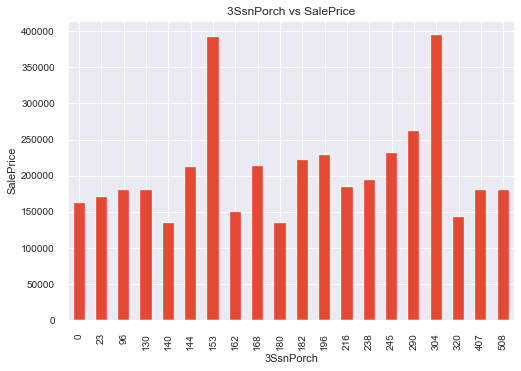

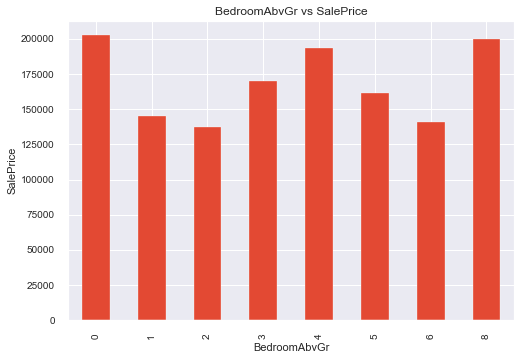

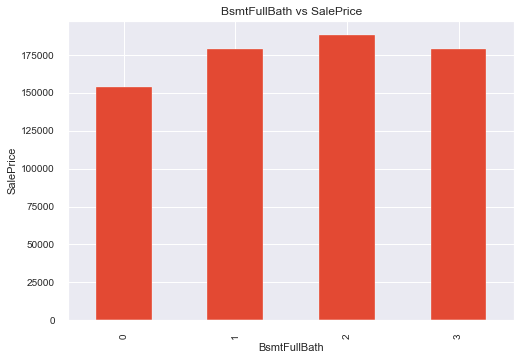

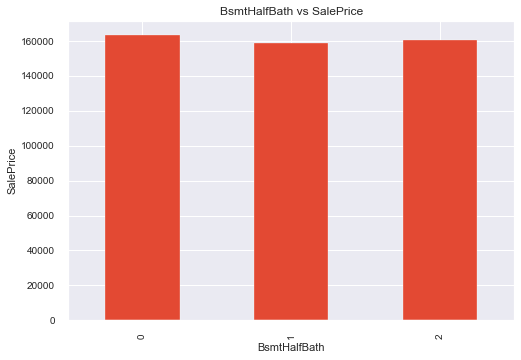

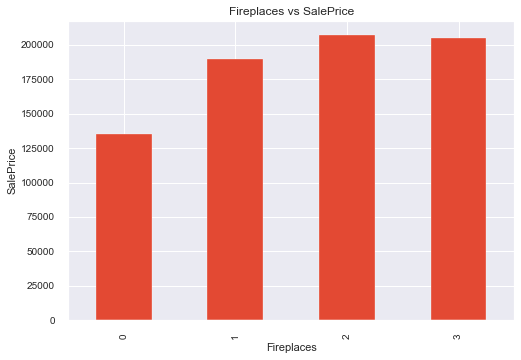

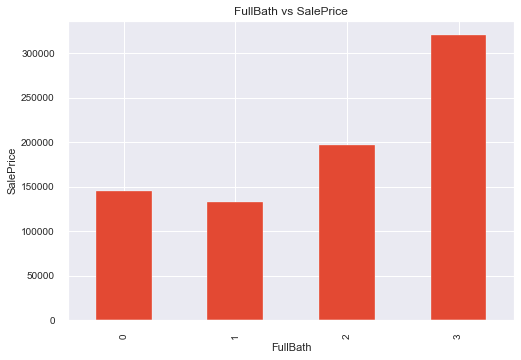

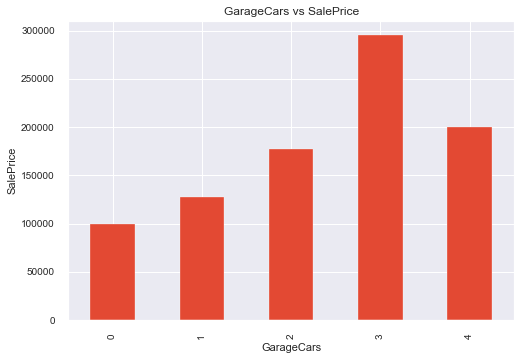

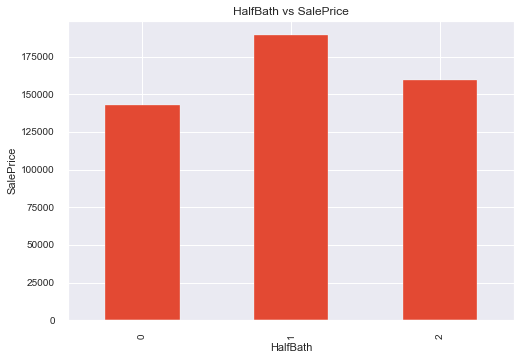

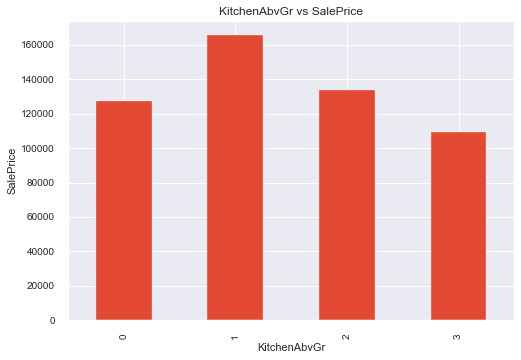

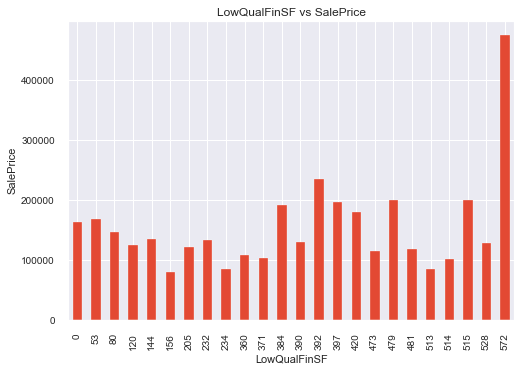

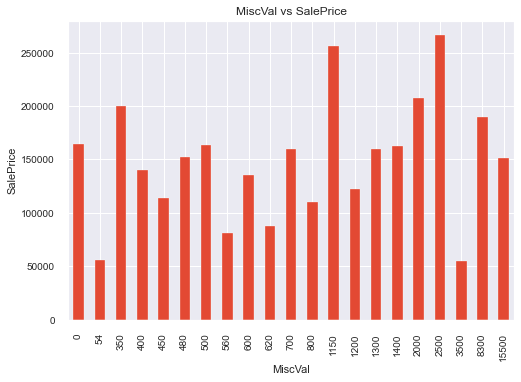

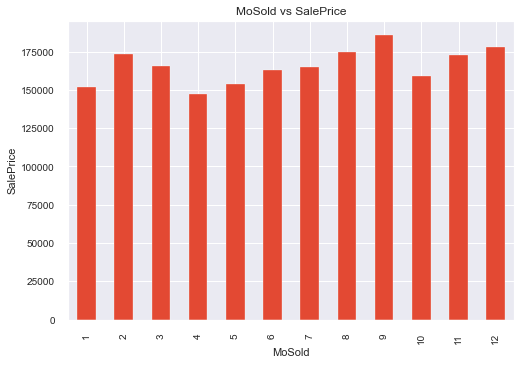

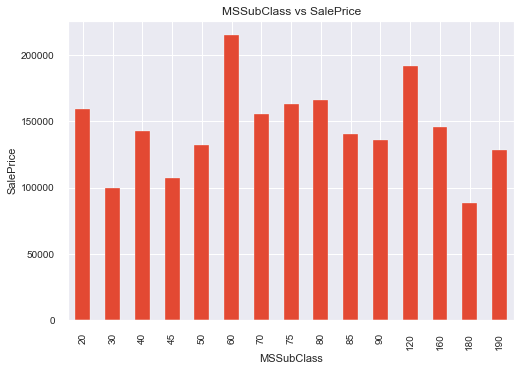

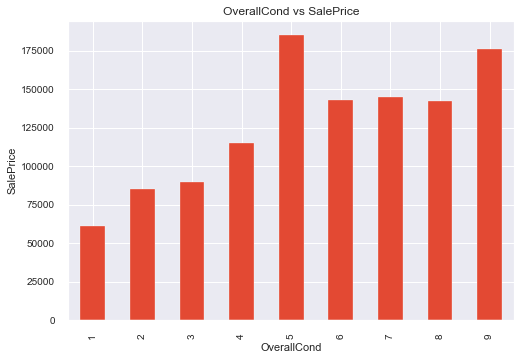

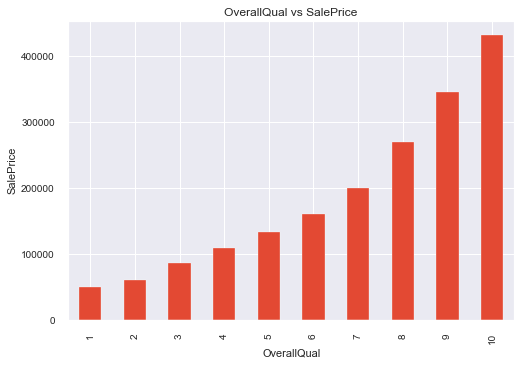

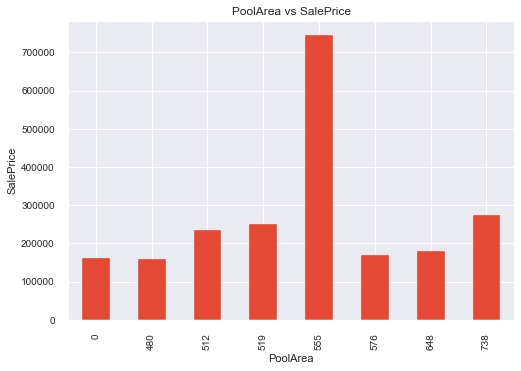

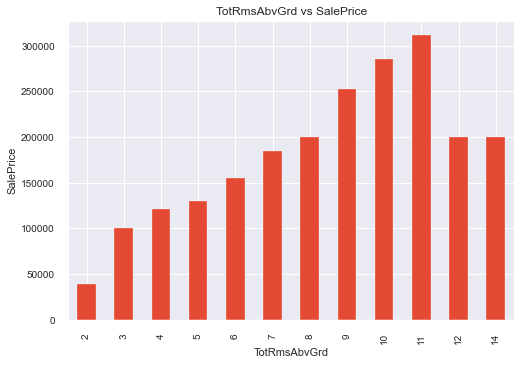

In [39]:
import matplotlib
for feature in features_numerical_discrete:
#    df_train.groupby(by=feature)['SalePrice'].median().plot.bar(color = list('rgbkymc'))
    df_train.groupby(by=feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature + ' vs SalePrice')
    plt.show()

In [40]:
features_numerical_continuous = [feature for feature in features_numerical if feature not in features_numerical_discrete+['Id', 'SalePrice']]
len(features_numerical_continuous)

19

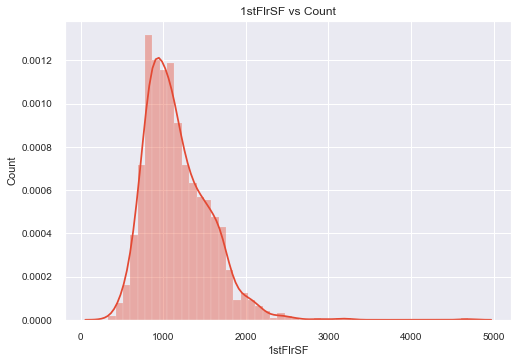

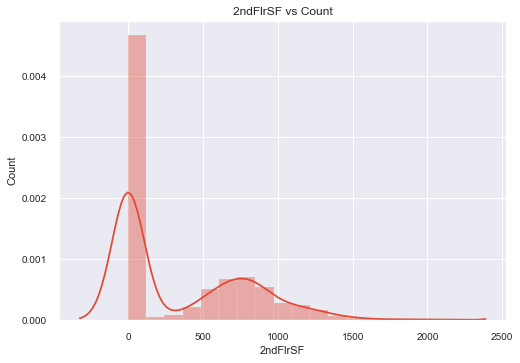

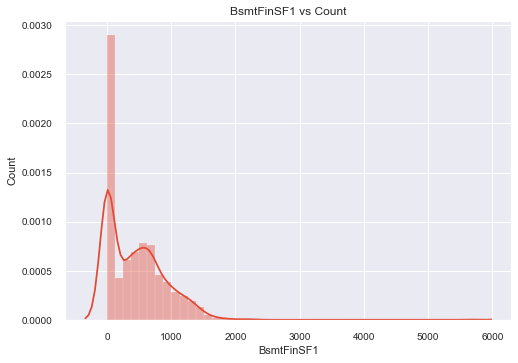

D:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


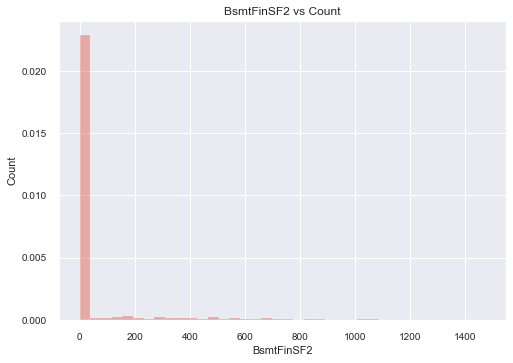

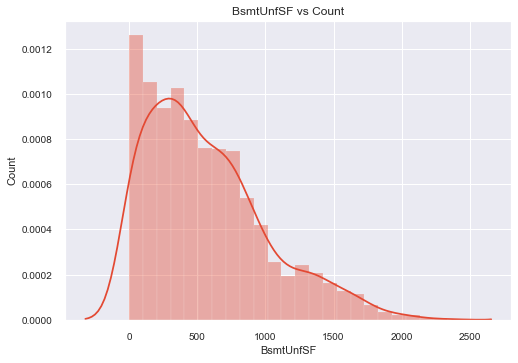

D:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


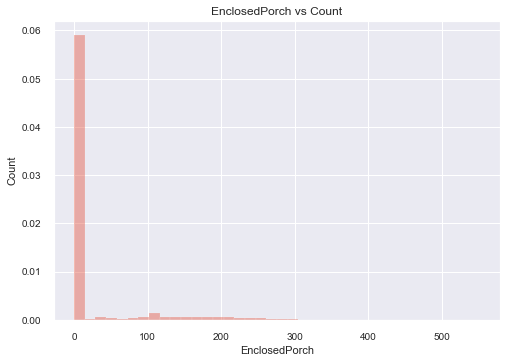

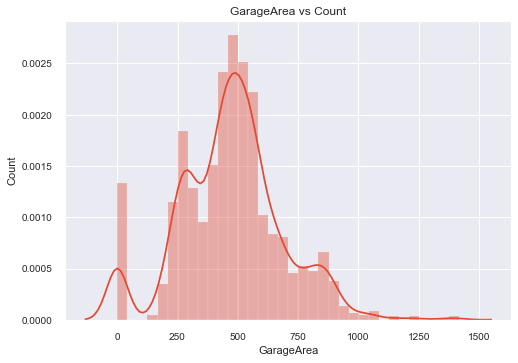

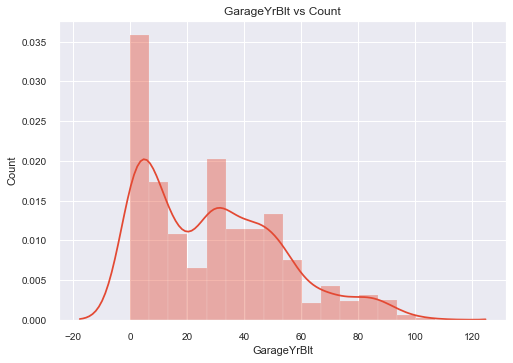

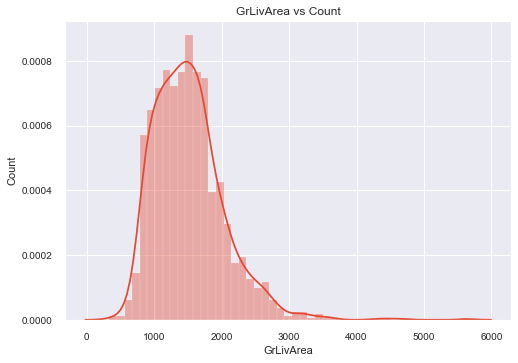

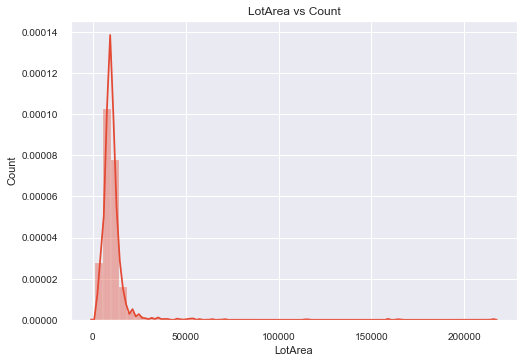

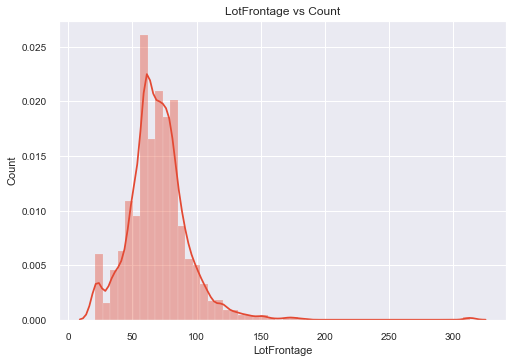

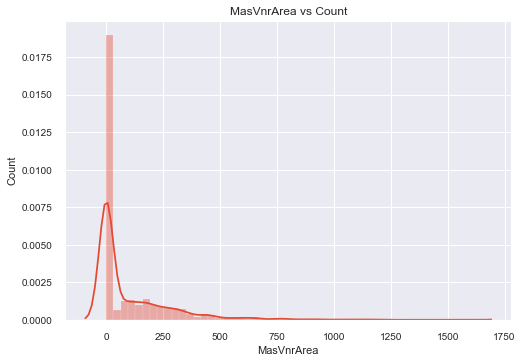

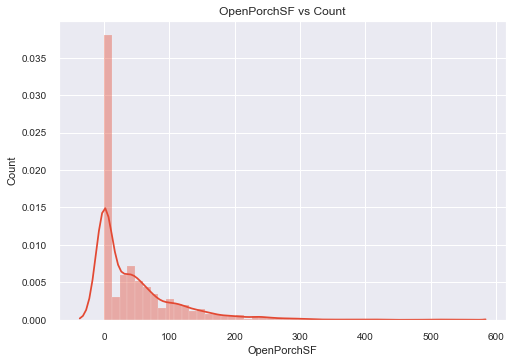

D:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


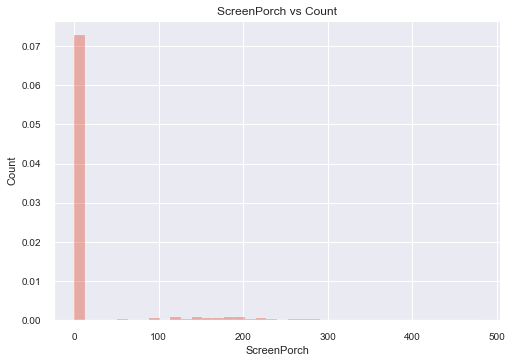

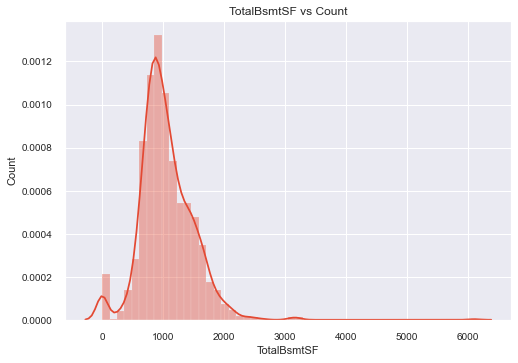

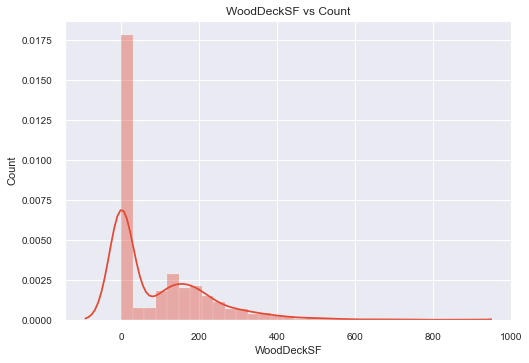

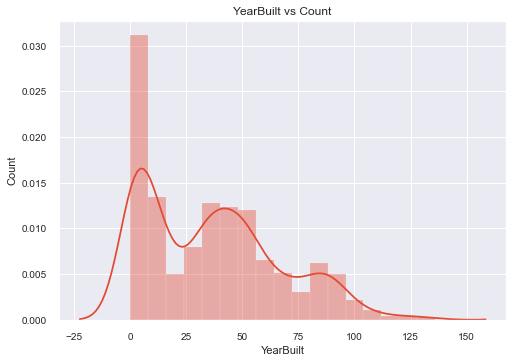

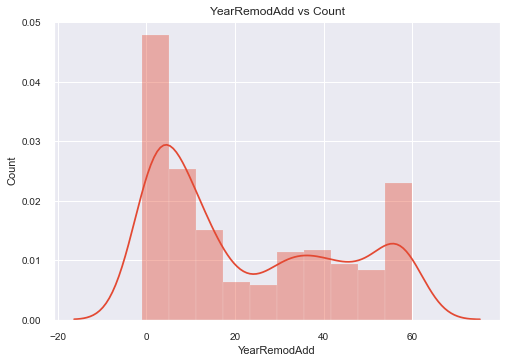

KeyError: 'YrSold'

In [41]:
for feature in features_numerical_continuous:
    sns.distplot(df_train[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature + ' vs Count')
    plt.show()

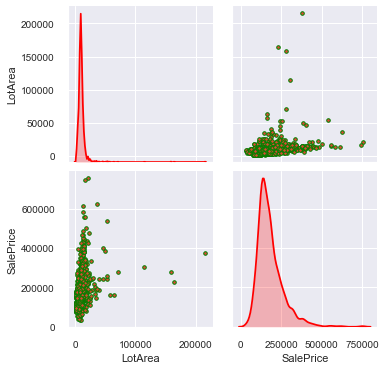

In [43]:
for feature in ['LotArea']:
    sns.pairplot(df_train[[feature, 'SalePrice']], kind='scatter', diag_kind='kde', markers=".", plot_kws=dict(s=50, edgecolor="green", linewidth=1), diag_kws=dict(shade=True, color='red'))
    plt.show()

In [44]:
features_with_nan = [x for x in df_train.columns if df_train[x].isna().any() & (df_train[x].dtype.name in ['object', 'category'])]
features_with_nan

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [52]:
for col in features_with_nan:
    print(col, ':', df_train[col].value_counts(ascending=False).index[0])
    df_train[col].fillna('Missing', inplace=True)
    unique_values = df_train[col].unique()
    df_test[col].fillna('Missing', inplace=True)
    df_test[col].apply(lambda x: x if x in unique_values else 'Rare_Var')
    
print(df_train['df_train: ', features_with_nan].isna().sum().sum())

Alley : Grvl
MasVnrType : None
BsmtQual : TA
BsmtCond : TA
BsmtExposure : No
BsmtFinType1 : Unf
BsmtFinType2 : Unf
Electrical : SBrkr
FireplaceQu : Gd
GarageType : Attchd
GarageFinish : Unf
GarageQual : TA
GarageCond : TA
PoolQC : Gd
Fence : MnPrv
MiscFeature : Shed


6617

In [ ]:
features_numerical_with_nan = [x for x in df_train.columns if df_train[x].isna().any() & (df_train[x].dtype.name not in ['object', 'category'])]
features_numerical_with_nan

In [ ]:
for x in features_numerical_with_nan:
    v_median = df_train[x].median()
    df_train[x].fillna(v_median, inplace=True)

In [37]:
for feature in ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd']:
    df_train[feature] = df_train['YrSold'] - df_train[feature]
    df_train[feature] = df_train[feature].astype('object')
    df_test[feature] = df_test['YrSold'] - df_test[feature]
    df_test[feature] = df_test[feature].astype('object')
    
df_train.drop(['YrSold'], axis=1, inplace=True)
df_test.drop(['YrSold'], axis=1, inplace=True)

In [ ]:
for feature in features_numerical_discrete:
    print(f'{feature} - {len(df_train[feature].unique())} : {sorted(df_train[feature].unique())}')
    

In [ ]:
for df in [df_train, df_test]:
    for feature in features_numerical_continuous:
        v_col = df[feature].astype(float)
        v_col = np.log1p(np.log1p(v_col))
        v_col = v_col.fillna(0)


    #    v_col = v_col.apply(lambda x: np.power(x, 1/3) if x >= 0 else -1*np.power(-x, 1/3))
    #    v_col = v_col.apply(lambda x: np.log1p(x) if x >= 0 else -1*np.log1p(-x))

        df[feature] = v_col

In [ ]:
for feature in features_numerical_continuous:
    sns.distplot(df_train[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature + ' vs Count')
    plt.show()

In [ ]:
for feature in features_numerical_continuous:
    print(feature, df_train[feature].skew())

In [ ]:

df_train[features_numerical_continuous]

In [ ]:
features_categorical = [col for col in df_train.dtypes[(df_train.dtypes=='O') | (df_train.dtypes=='category')].index if not(col.endswith('_na')) ]
features_categorical

In [ ]:
for feature in features_categorical+features_numerical_discrete:
    temp = df_train.groupby(feature)['SalePrice'].count()/df_train[feature].count()
    temp_df = temp[temp>0.01].index
    df_train[feature] = np.where(df_train[feature].isin(temp_df), df_train[feature], 'Rare_Var')
#    df_test[feature] = np.where(df_test[feature].isin(temp_df), df_test[feature], 'Rare_Var')  
    unique_vals = df_train[feature].unique()
    df_test[feature] = df_test.apply(lambda x:'Rare_Var' if x[feature] not in unique_vals else x[feature], axis=1)

In [ ]:
df_train[85:95]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
features_categorical_numerical_discrete_encoded = features_categorical+features_numerical_discrete
df_others = {col:'Rare_Var' for col in features_categorical_numerical_discrete_encoded}
oe = OrdinalEncoder().fit(df_train[features_categorical_numerical_discrete_encoded].astype(str).append(df_others, ignore_index=True).astype(str))

In [ ]:
for feature in features_categorical_numerical_discrete_encoded:
    train_feature_unique_values = df_train[feature].unique()
    df_test[feature] = df_test[feature].apply(lambda x: x if x in train_feature_unique_values else 'Rare_Var' )

In [ ]:
df_train.drop(features_replaced_further_analysis, inplace=True, axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
features_numerical_continuous_encoded = features_numerical_continuous.copy()
std_scaler = StandardScaler()
mx_scaler = MinMaxScaler()
std_scaler.fit(df_train[features_numerical_continuous_encoded])

In [ ]:
df_train_scaled = pd.DataFrame(std_scaler.transform(df_train[features_numerical_continuous_encoded]), columns=features_numerical_continuous_encoded)
df_test_scaled = pd.DataFrame(std_scaler.transform(df_test[features_numerical_continuous_encoded]), columns=features_numerical_continuous_encoded)
df_train_scaled

In [ ]:
df_train_oe = pd.DataFrame(oe.transform(df_train[features_categorical_numerical_discrete_encoded].astype(str)), columns=features_categorical_numerical_discrete_encoded)
df_test_oe = pd.DataFrame(oe.transform(df_test[features_categorical_numerical_discrete_encoded].astype(str)), columns=features_categorical_numerical_discrete_encoded)

In [ ]:
df_train_oe

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit(df_train_oe)
df_train_ohe = pd.DataFrame(ohe.transform(df_train_oe))
df_test_ohe = pd.DataFrame(ohe.transform(df_test_oe))
df_train_ohe

In [ ]:
df_train_transformed = pd.concat([df_train[['Id', 'SalePrice']], df_train_scaled, df_train_ohe], axis=1)
df_test_transformed = pd.concat([df_test[['Id']], df_test_scaled, df_test_ohe], axis=1)
df_train_transformed

In [ ]:
X = df_train_transformed.drop(['Id', 'SalePrice'], axis=1)
y = df_train_transformed['SalePrice']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
X.shape

In [ ]:
df_train_transformed.shape

In [ ]:
df_test_transformed.shape

In [ ]:
df_train_intermediate = pd.concat([df_train_scaled, df_train_oe], axis=1)
df_test_intermediate = pd.concat([df_test_scaled, df_test_oe], axis=1)
df_train_intermediate

In [ ]:
[x for x in df_train.columns if x not in df_train_intermediate.columns]

In [ ]:
df_train_intermediate.shape

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

X_train = df_train_intermediate.copy()
y_train = df_train_transformed['SalePrice']

In [ ]:
#feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0, fit_intercept=True))
#feature_sel_model.fit(X_train, y_train)
#X_train.columns[feature_sel_model.get_support()]

In [ ]:
X = df_train_transformed.drop(['Id', 'SalePrice'], axis=1)
y = df_train_transformed['SalePrice']

In [ ]:
X.shape

In [ ]:
X.columns[X.isna().any()]

In [ ]:
X[X['YearRemodAdd'].isna()]
df_train_scaled[df_train_scaled['YearRemodAdd'].isna()]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=207)

In [ ]:
rf = RandomForestRegressor(n_estimators=300,       # No of trees in forest
                             criterion = "mse",       # Can also be mae
                             max_features = "sqrt",  # no of features to consider for the best split
                             max_depth= 10,    #  maximum depth of the tree
                             min_samples_split= 2,   # minimum number of samples required to split an internal node
                             min_impurity_decrease=0, # Split node if impurity decreases greater than this value.
                             oob_score = True,       # whether to use out-of-bag samples to estimate error on unseen data.
                             n_jobs = -1,            #  No of jobs to run in parallel
                             random_state=0,
                             verbose = 0            # Controls verbosity of process
                             )

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
rf.oob_score_

In [ ]:
y_pred=rf.predict(X_test)
squared = np.square(y_pred - y_test)
rf_error = np.sqrt(np.sum(squared)/len(y_test))
rf_error

In [ ]:
from sklearn.linear_model import Ridge
def rmse_ridge(ridge_model):
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    squared = np.square(y_pred-y_test)
    ridge_error = np.sqrt(np.sum(squared)/len(y_test))
    return(ridge_error)

alphas = [0.01, 0.02, 0.1, 0.3, 1, 3, 5, 10, 20, 30,40,100]
cv_ridge = [rmse_ridge(Ridge(alpha = alpha )).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = " Parameter tuning - Ridge")
#plt.xlabel("alpha")
#plt.ylabel("rmse")
cv_ridge.min()

In [ ]:
cv_ridge.to_dict()

In [ ]:
ridge_model = Ridge(alpha = 20.0 )
ridge_model.fit(X_train, y_train)
result = ridge_model.predict(df_test_transformed)
result_df = pd.DataFrame(result, columns=['SalePrice'])
final_result_df = pd.concat([df_test[['Id']], result_df], axis=1)
final_result_df.to_csv('D:/Study/Python/Projects/house_prices_advanced_regression_techniques/predicted_SalePrices.csv', index=False)

In [ ]:
df_test.columns[df_test.isna().any()].size

In [ ]:
df_test_transformed.columns[df_test_transformed.isna().any()]

In [ ]:
df_test_transformed[df_test_transformed['BsmtFinSF1'].isna()]

In [ ]:
df_test_1 = pd.read_csv("D:/Study/Python/data-set/house_prices_advanced_regression_techniques/test.csv")